# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import learning_curve
from autoviz.AutoViz_Class import AutoViz_Class
import warnings
%matplotlib inline


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Loda Dataset

In [3]:
df = pd.read_csv("C:/Users/prasa/Desktop/crop recommendation/dataset/crop_recommendation.csv")
df['label'].nunique()

20

# EDA

In [4]:
print("Display the first 10 rows")
df.head()

Display the first 10 rows


,N,P,K,temperature,humidity,ph,rainfall,label
0,41.9,44.6,47.6,17.57,66.89,6.91,61.39,Barley
1,94.9,69.0,75.6,21.29,70.25,6.54,83.82,Maize
2,94.7,59.3,53.1,26.12,84.51,6.74,225.88,Rice
3,59.8,64.0,58.2,18.44,70.99,6.41,53.55,Onion
4,56.4,32.8,23.6,28.88,46.79,6.56,48.26,Millet


Shape of your Data Set loaded: (5050, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
To fix these data quality 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
N,float64,0.359784,NA,-9.897950,297.166279,"18 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 8 outliers greater than upper bound (176.35) or lower than lower bound(-43.25). Cap them or remove them."
P,float64,0.319808,NA,-9.975265,273.511549,"16 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 42 outliers greater than upper bound (112.15) or lower than lower bound(6.95). Cap them or remove them."
K,float64,0.279832,NA,-5.099612,549.300000,"14 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 267 outliers greater than upper bound (149.65) or lower than lower bound(-36.35). Cap them or remove them."
temperature,float64,0.239856,NA,-4.798749,59.262169,"12 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 25 outliers greater than upper bound (40.52) or lower than lower bound(4.06). Cap them or remove them."
humidity,float64,0.359784,NA,7.513541,119.192052,"18 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 11 outliers greater than upper bound (106.62) or lower than lower bound(38.27). Cap them or remove them."
ph,float64,0.259844,NA,1.213481,13.871917,"13 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 299 outliers greater than upper bound (7.43) or lower than lower bound(5.43). Cap them or remove them."
rainfall,float64,0.179892,NA,0.278578,789.571934,"9 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 290 outliers greater than upper bound (163.30) or lower than lower bound(-13.35). Cap them or remove them."
label,object,0.000000,0,,,Target column. Appears to have Imbalanced classes. Try balancing classes.


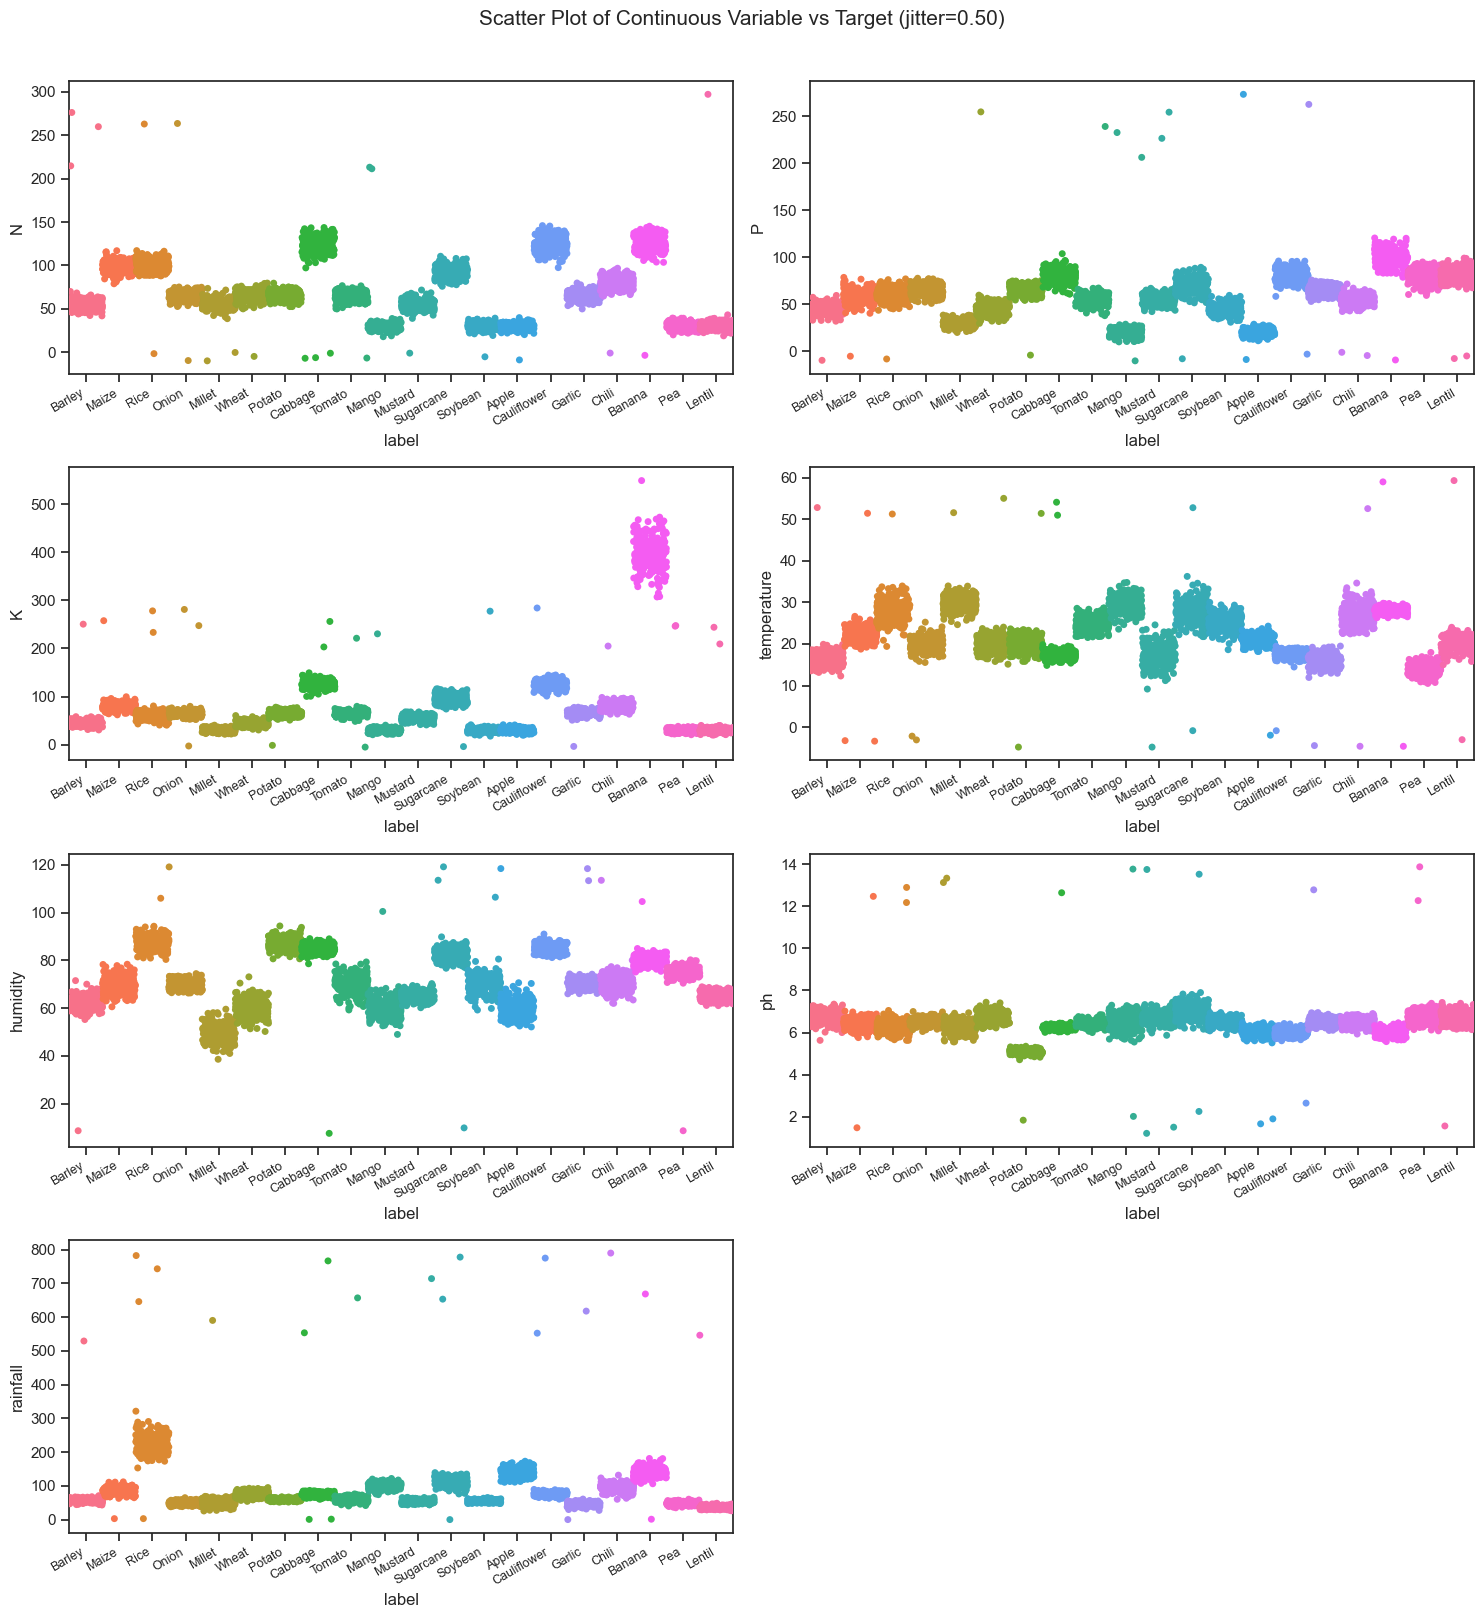

Total Number of Scatter Plots = 28


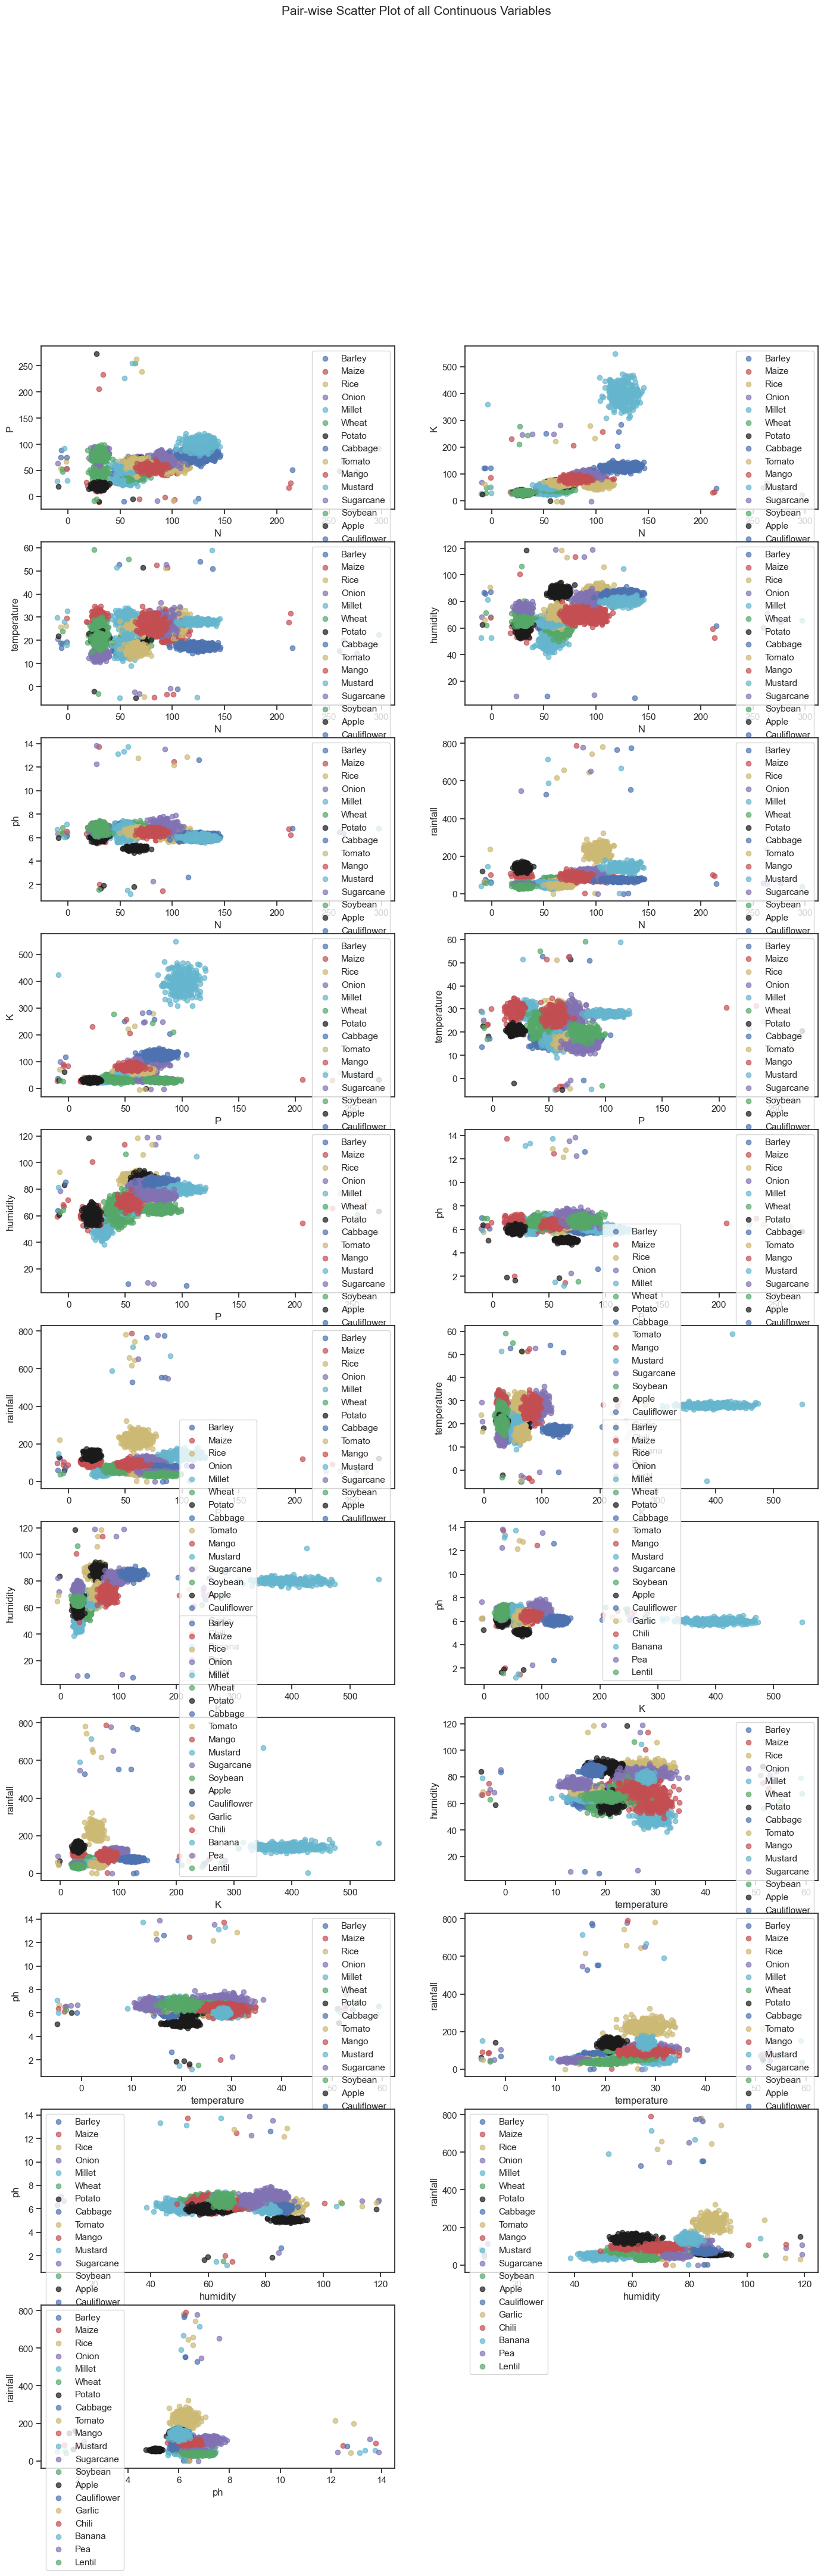

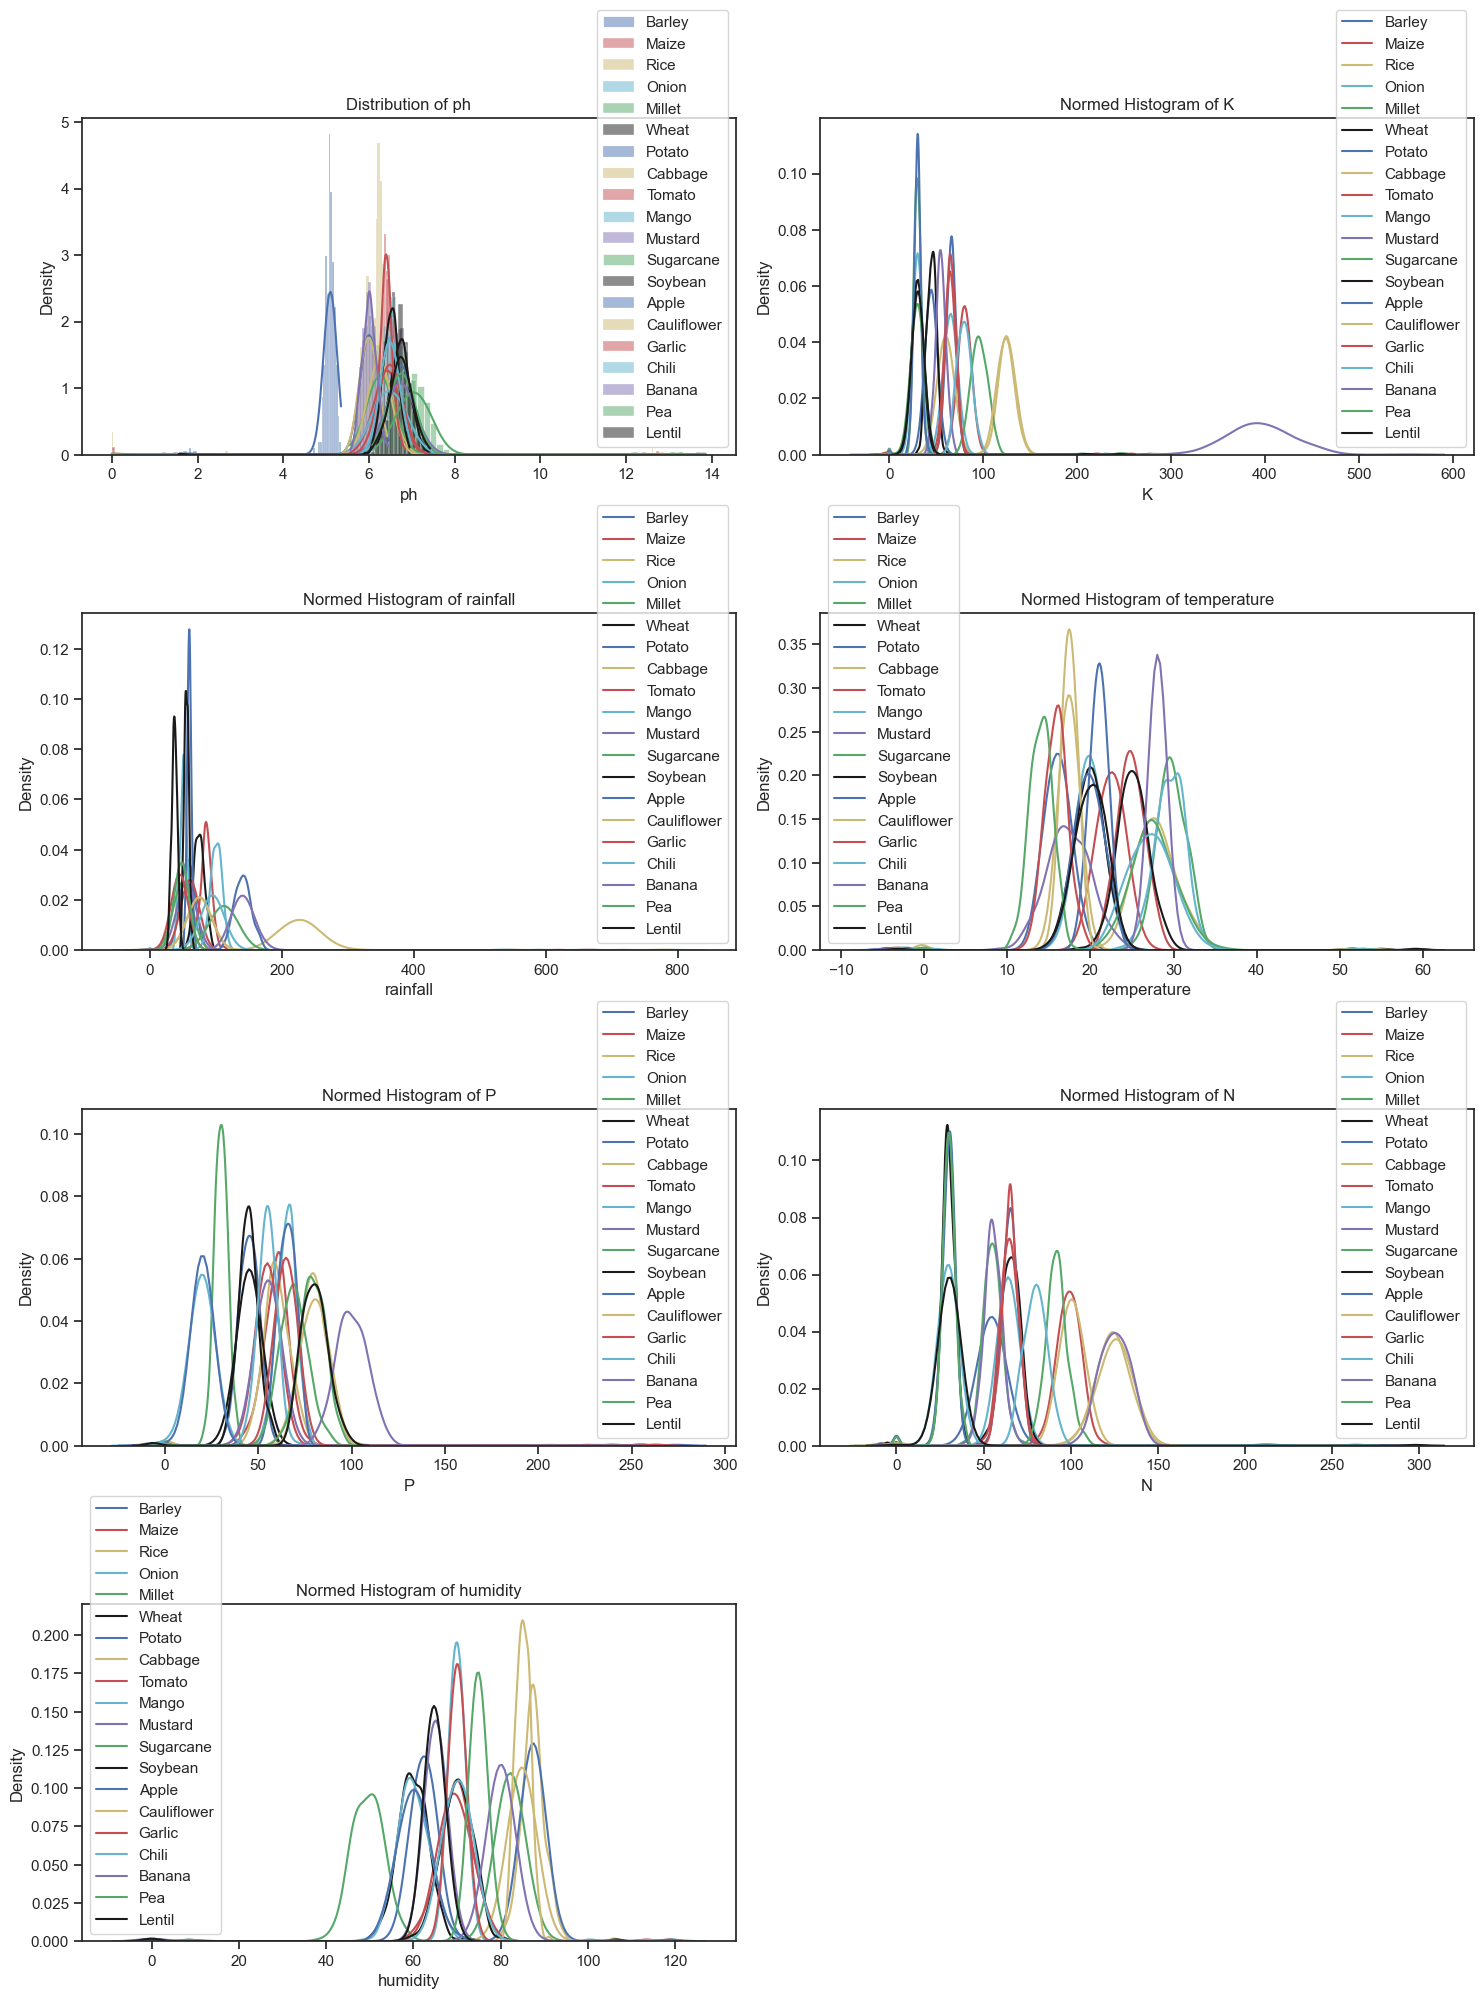

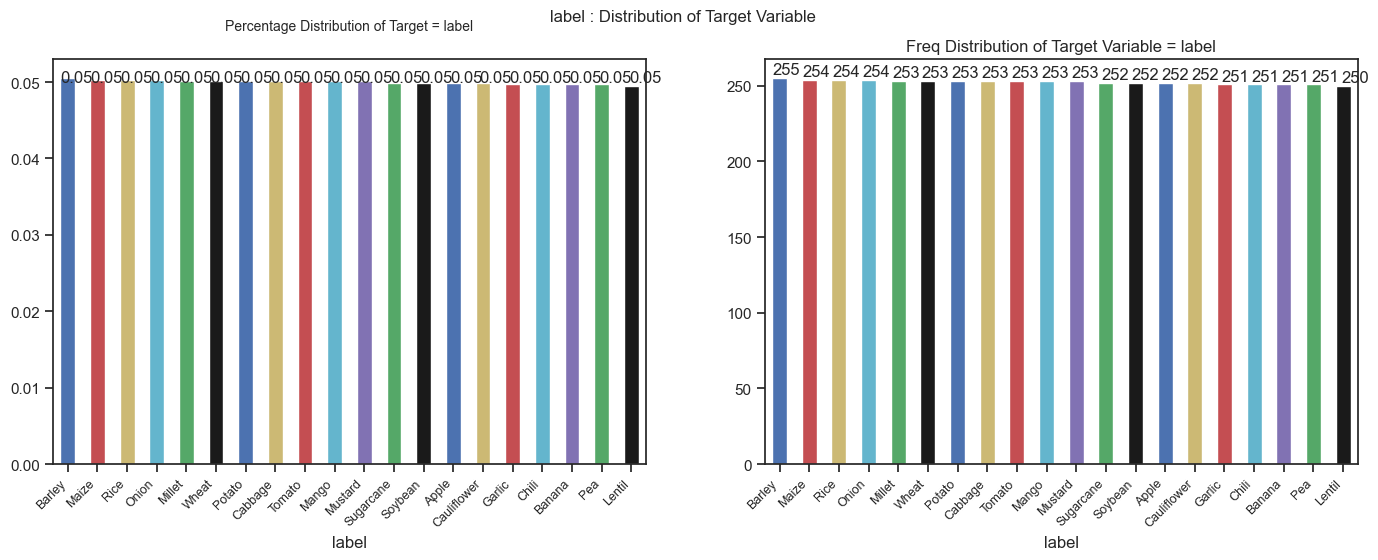

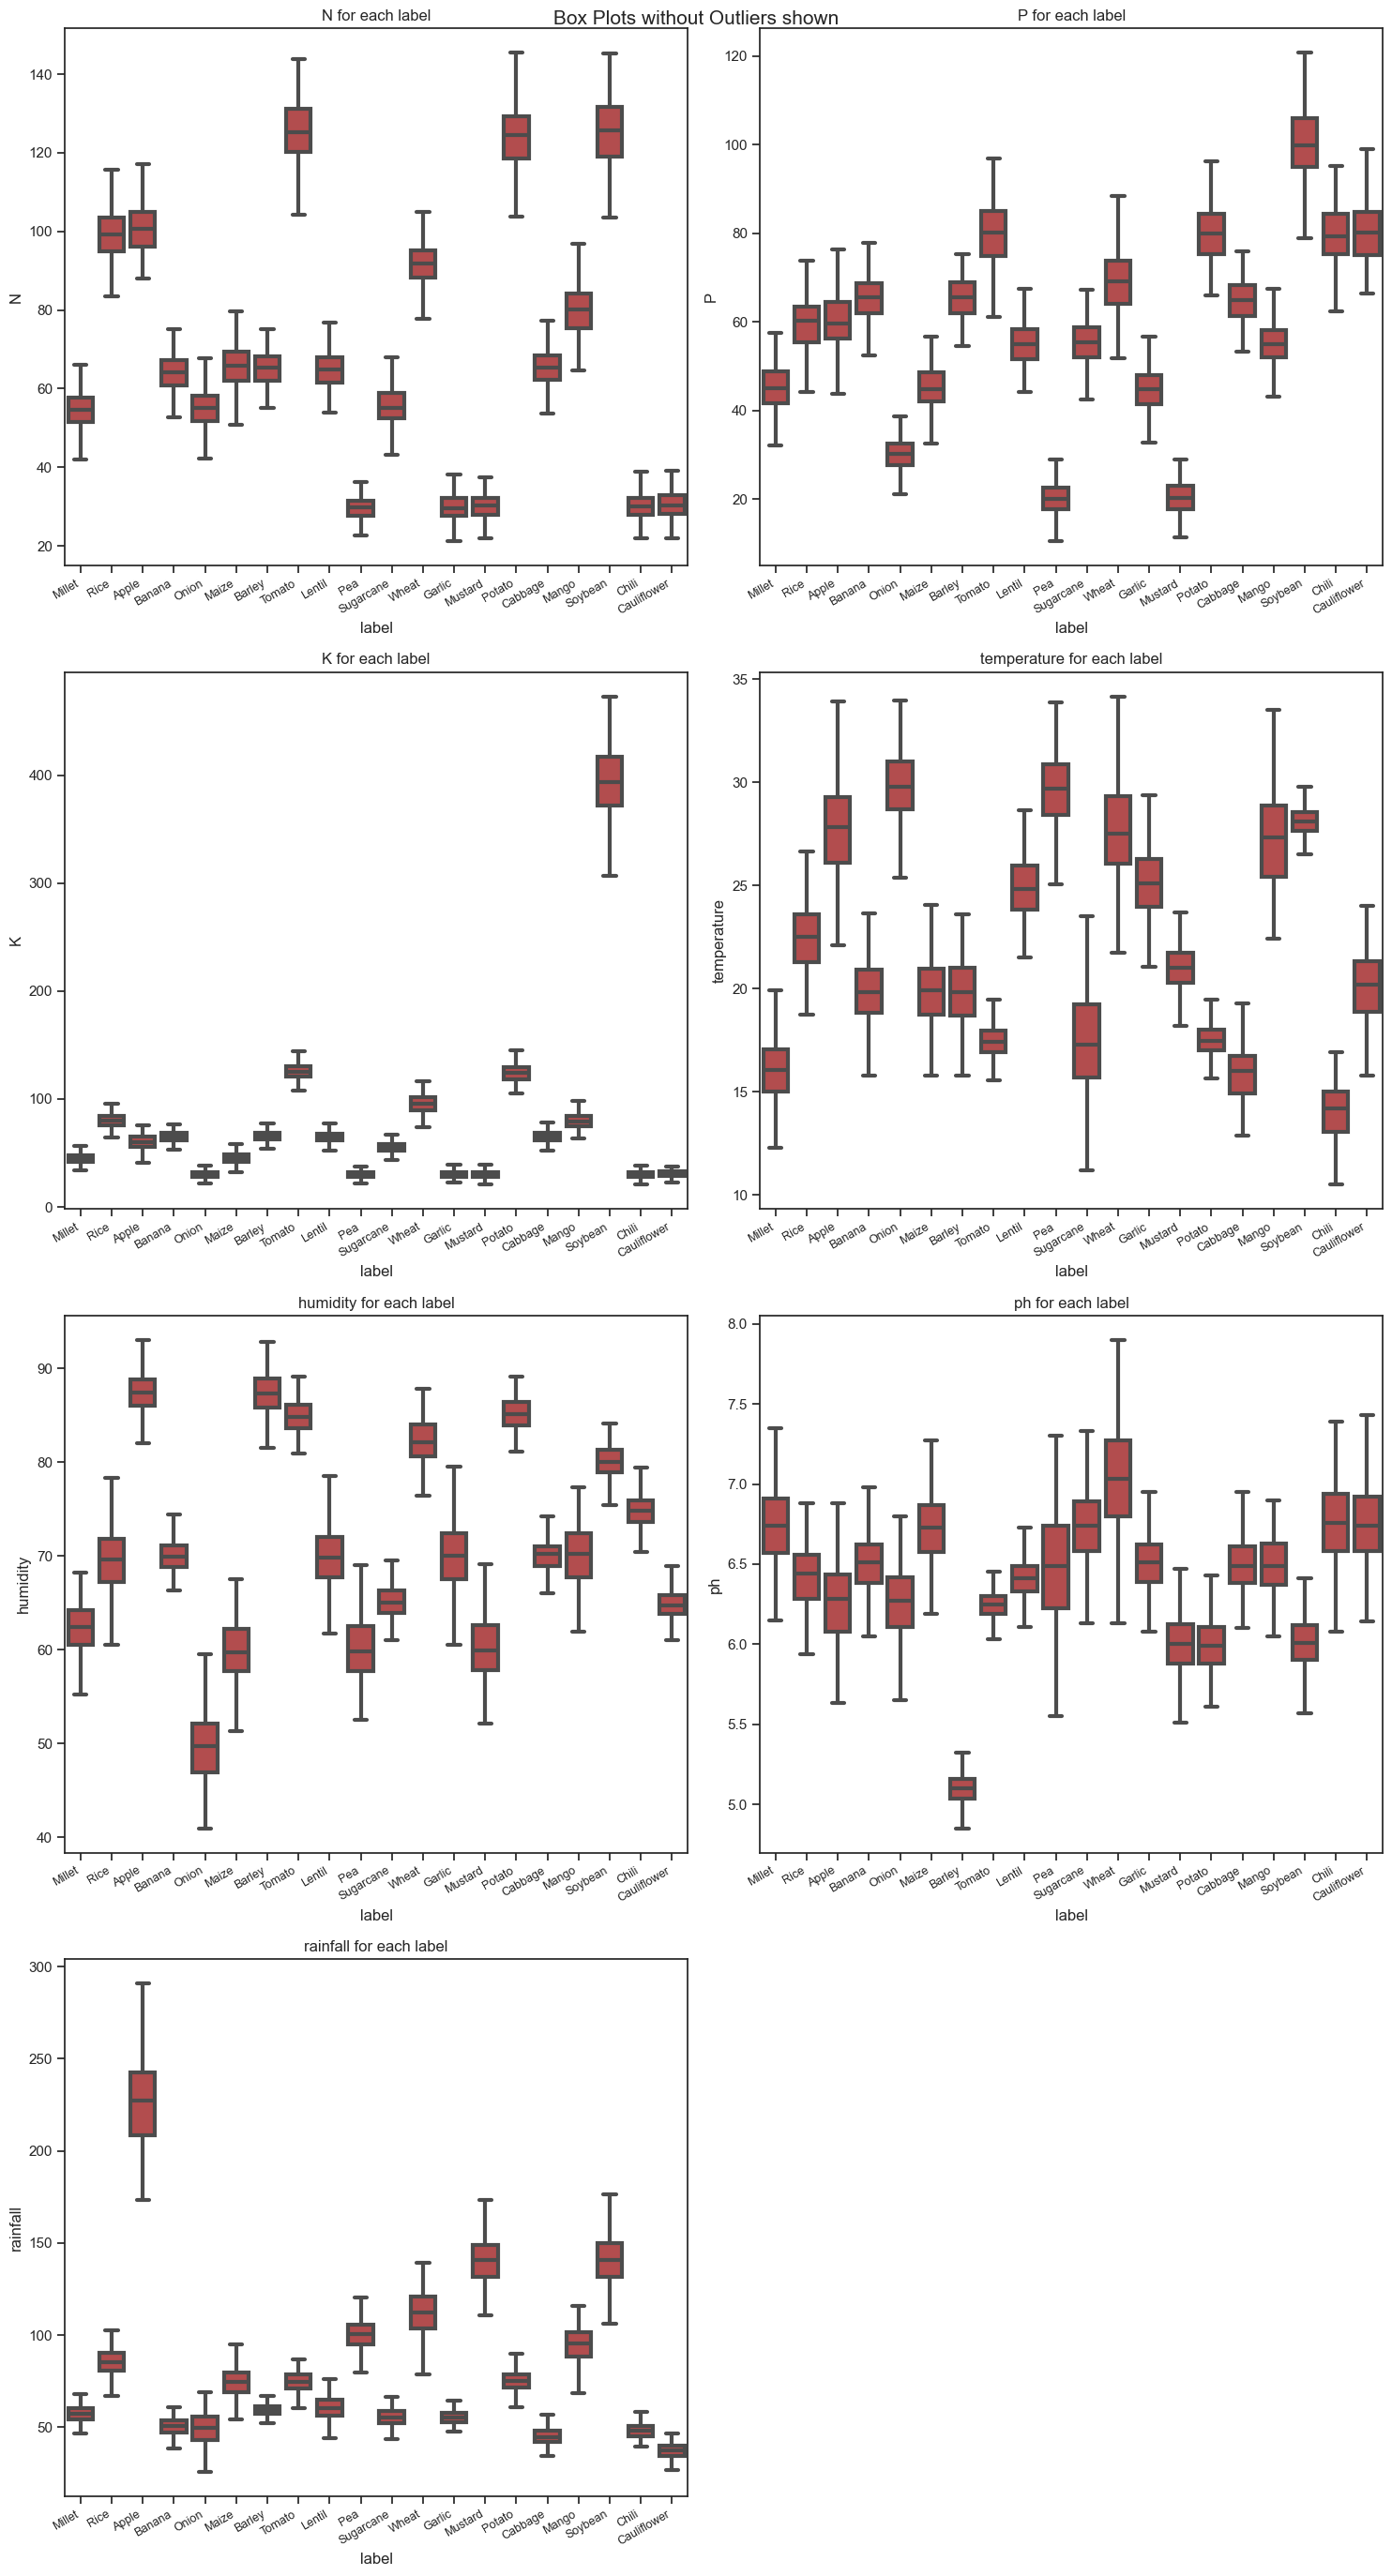

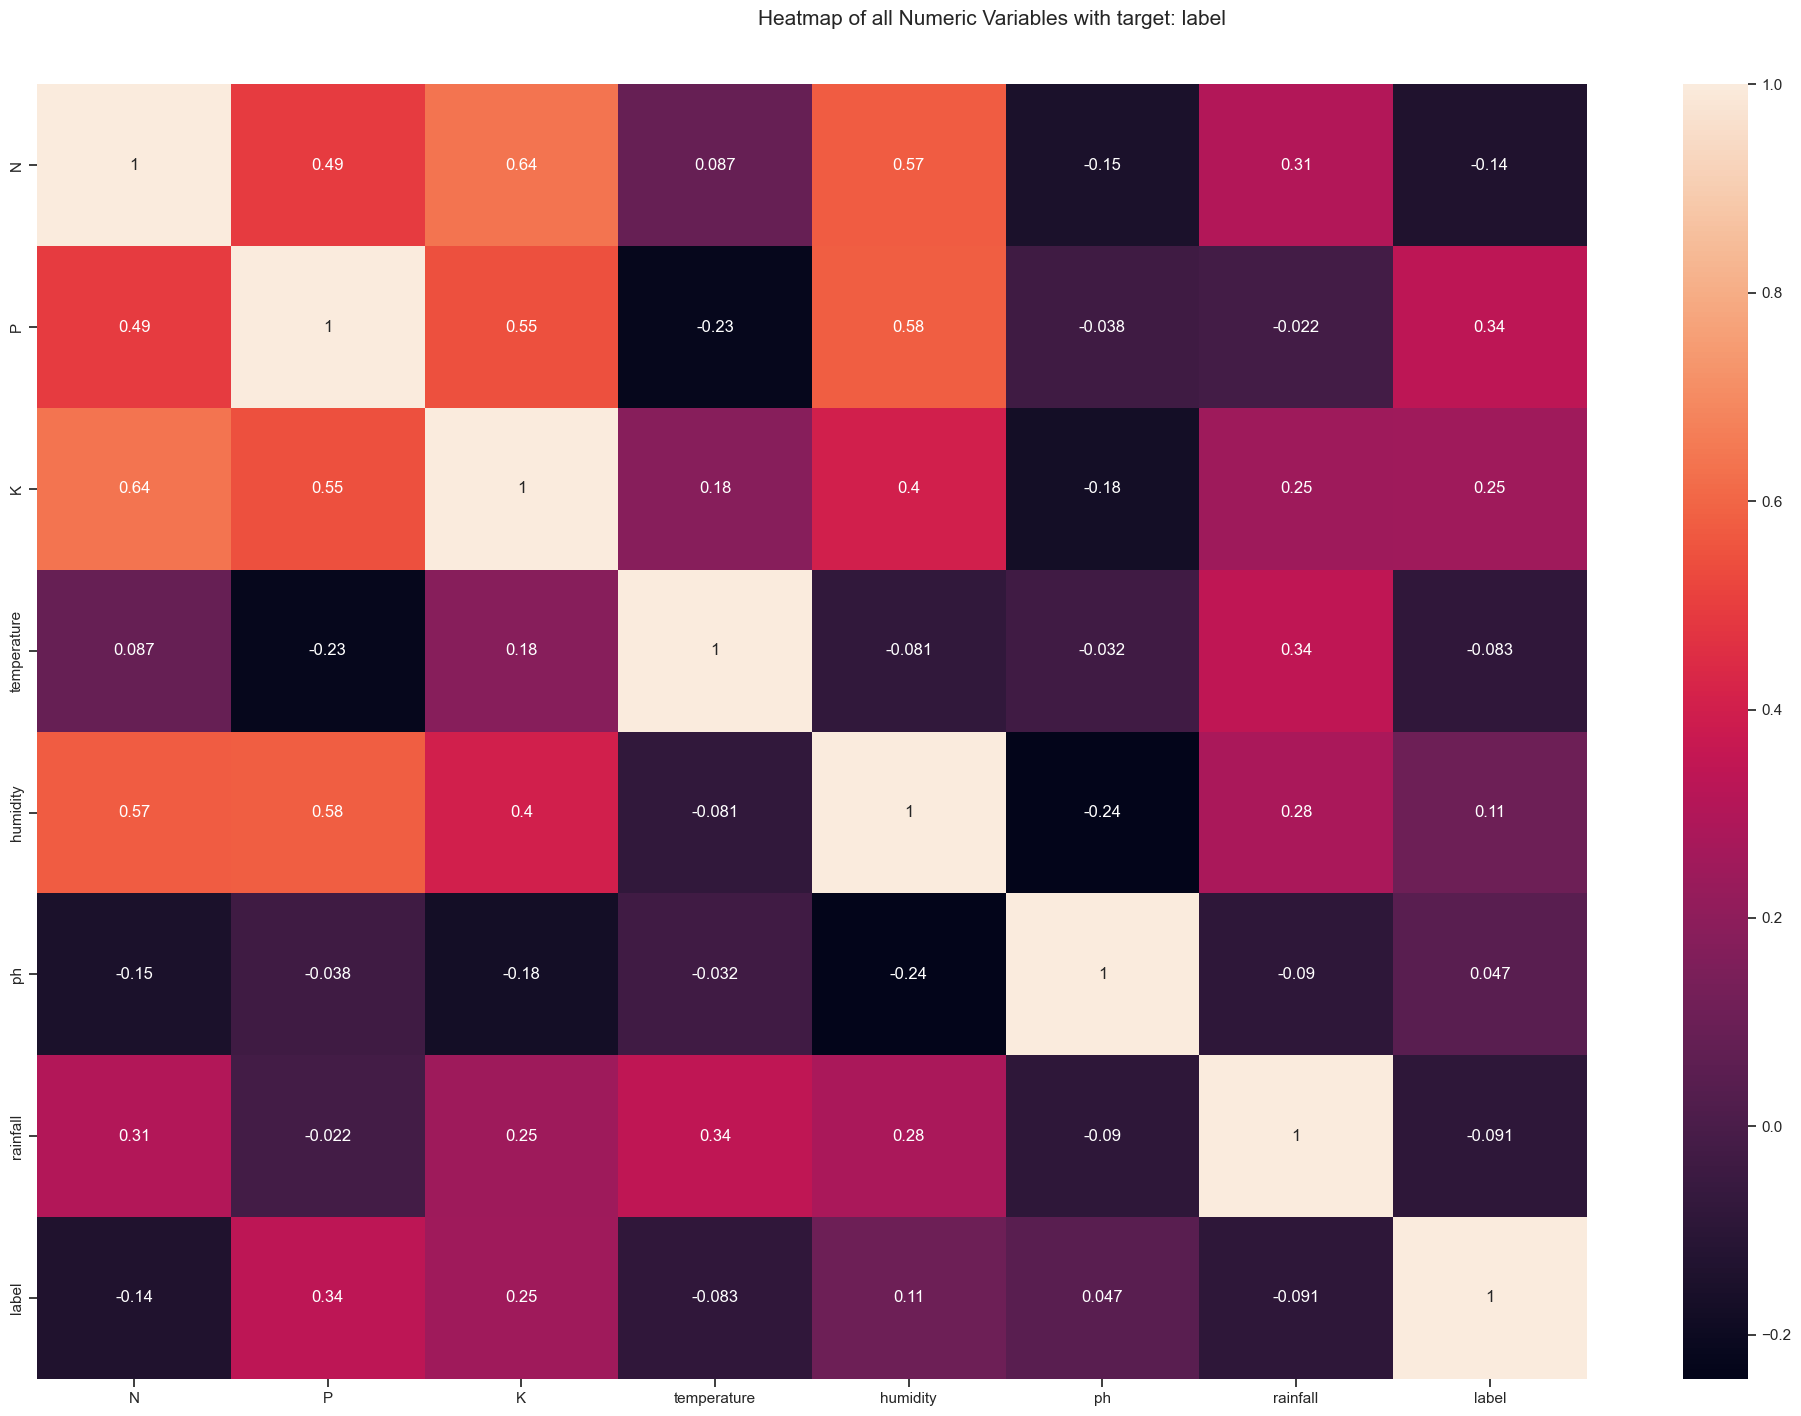

All Plots done
Time to run AutoViz = 56 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,N,P,K,temperature,humidity,ph,rainfall,label
0,41.9,44.6,47.6,17.57,66.89,6.91,61.39,0
1,94.9,69.0,75.6,21.29,70.25,6.54,83.82,1
2,94.7,59.3,53.1,26.12,84.51,6.74,225.88,2
3,59.8,64.0,58.2,18.44,70.99,6.41,53.55,3
4,56.4,32.8,23.6,28.88,46.79,6.56,48.26,4
...,...,...,...,...,...,...,...,...
5045,55.0,61.5,51.9,19.53,61.57,7.04,50.50,10
5046,60.5,50.9,48.3,23.24,57.07,6.66,76.93,5
5047,136.1,82.4,144.6,18.01,86.74,6.01,71.10,14
5048,30.3,83.6,32.8,14.56,73.75,7.20,48.53,18


In [34]:

AV = AutoViz_Class()
%matplotlib inline

filename = "C:/Users/prasa/Desktop/crop recommendation/dataset/crop_recommendation.csv"
target_variable = "label"
AV.AutoViz(filename=filename,depVar=target_variable)

### Data types of feature 

In [5]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

### checking missing and duplicate values

In [6]:
# Checking missing values
missing_v = df.isnull().sum()

# Percentage of missing values per column
missing_percent_col = (missing_v / len(df)) * 100

# Total missing values in dataset
total_missing = missing_v.sum()
# Percentage of missing values in entire dataset
total_missing_percent = (total_missing / (df.shape[0] * df.shape[1])) * 100

# Printing results
print("Missing values per column:\n", missing_v)
print("\nPercentage of missing values per column:\n", missing_percent_col.round(2))
print("\nTotal missing values:", total_missing)
print(f"Percentage of missing values in the dataset: {total_missing_percent:.2f}%")
print("\nDuplicate rows ",df.duplicated().sum())


Missing values per column:
 N              18
P              16
K              14
temperature    12
humidity       18
ph             13
rainfall        9
label           0
dtype: int64

Percentage of missing values per column:
 N              0.36
P              0.32
K              0.28
temperature    0.24
humidity       0.36
ph             0.26
rainfall       0.18
label          0.00
dtype: float64

Total missing values: 100
Percentage of missing values in the dataset: 0.25%

Duplicate rows  47


### Handling duplicates and missing values

In [7]:
# remove missing values
df = df.dropna(subset=['N','P','K','temperature','humidity','ph','rainfall'])

# remove first row if duplicate row exists 
df = df.drop_duplicates(subset=['N','P','K','temperature','humidity','ph','rainfall'])


print("After data clening")
print("Missing values per columns\n",df.isnull().sum())
print("\nDuplicate row ",df.duplicated().sum())

After data clening
Missing values per columns
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicate row  0


In [8]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

### Statistical Summary of the Dataset

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,69.320689,58.914440,77.746036,22.113405,71.181373,6.402470,83.916712
std,33.134858,22.449739,79.678064,5.551514,10.896971,0.601475,56.663487
min,-9.897950,-9.975265,-5.099612,-4.798749,7.513541,1.213481,0.278578
25%,38.850000,46.300000,33.300000,17.745000,63.885000,6.180000,52.895000
50%,64.100000,59.800000,60.300000,21.320000,69.970000,6.430000,66.340000
75%,93.850000,72.600000,79.600000,26.855000,80.940000,6.680000,97.045000
max,297.166279,273.511549,549.300000,59.262169,119.192052,13.871917,789.571934


# Feature engineering
### Checking outliers

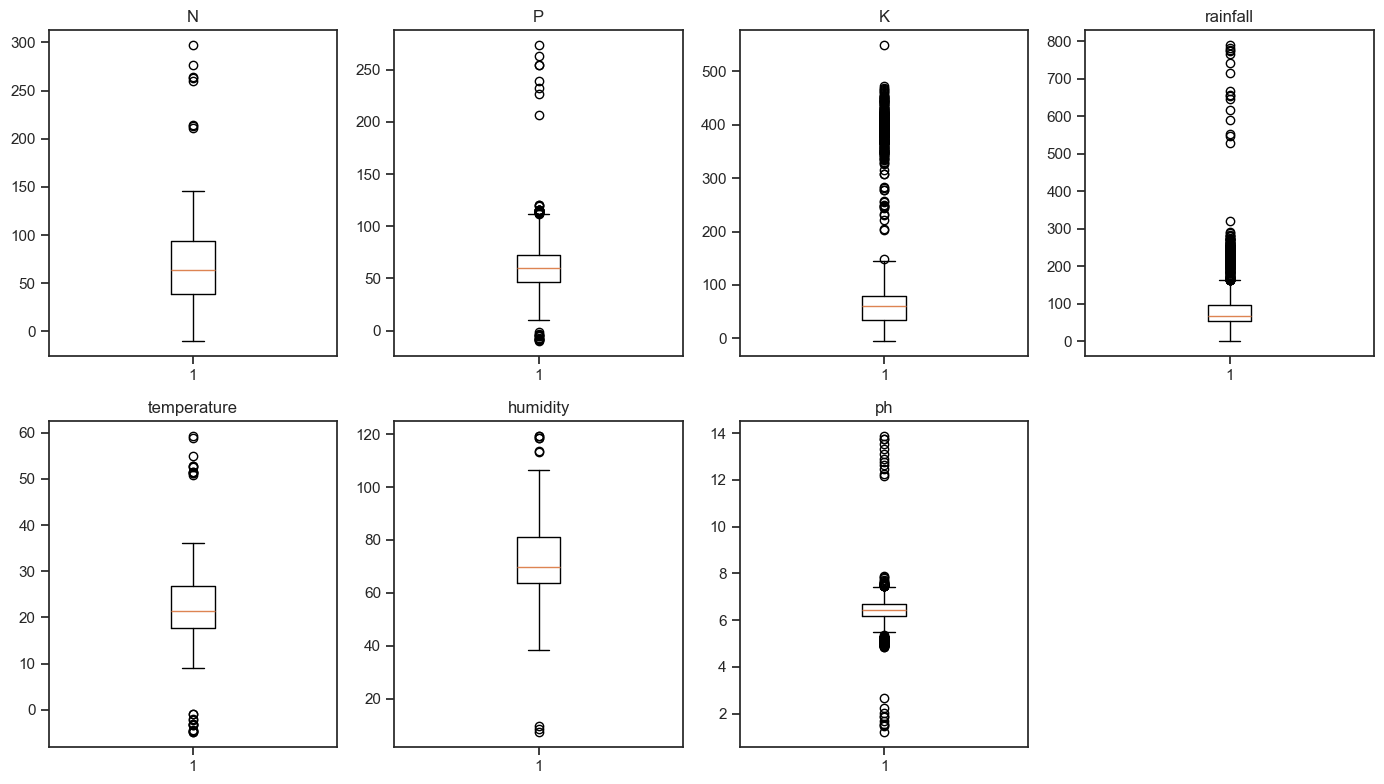

In [10]:
plt.figure(figsize=(14,8))
plt.subplot(2,4,1)
plt.boxplot(df['N'])
plt.title("N")

plt.subplot(2,4,2)
plt.boxplot(df['P'])
plt.title("P")

plt.subplot(2,4,3)
plt.boxplot(df['K'])
plt.title("K")

plt.subplot(2,4,4)
plt.boxplot(df['rainfall'])
plt.title("rainfall")


plt.subplot(2,4,5)
plt.boxplot(df['temperature'])
plt.title("temperature")

plt.subplot(2,4,6)
plt.boxplot(df['humidity'])
plt.title("humidity")

plt.subplot(2,4,7)
plt.boxplot(df['ph'])
plt.title("ph")

plt.tight_layout()
plt.show()

## Remove outlier

In [11]:
cols = ['N','P','K','rainfall','temperature','humidity','ph']

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower) & (df[col] <= upper)]
df.shape

(3957, 8)

### After remove outlier

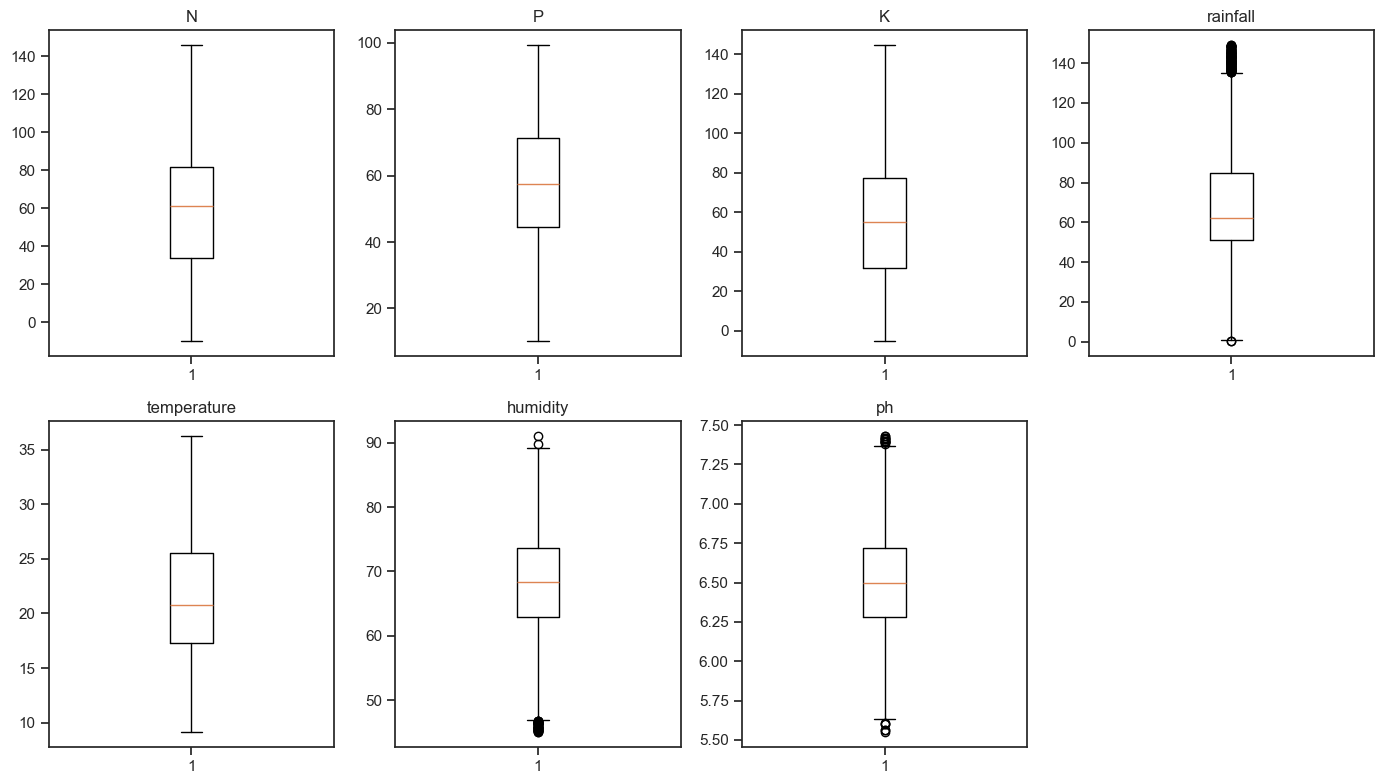

In [12]:
plt.figure(figsize=(14,8))
plt.subplot(2,4,1)
plt.boxplot(df['N'])
plt.title("N")

plt.subplot(2,4,2)
plt.boxplot(df['P'])
plt.title("P")

plt.subplot(2,4,3)
plt.boxplot(df['K'])
plt.title("K")

plt.subplot(2,4,4)
plt.boxplot(df['rainfall'])
plt.title("rainfall")


plt.subplot(2,4,5)
plt.boxplot(df['temperature'])
plt.title("temperature")

plt.subplot(2,4,6)
plt.boxplot(df['humidity'])
plt.title("humidity")

plt.subplot(2,4,7)
plt.boxplot(df['ph'])
plt.title("ph")

plt.tight_layout()
plt.show()

### Feature transformation

In [17]:
# uniue crops 
df['label'].nunique()

18

In [18]:
crops_dict = {
    "Sugarcane": 1,
    "Mango": 2,
    "Cauliflower": 3,
    "Tomato": 4,
    "Maize": 5,
    "Cabbage": 6,
    "Millet": 7,
    "Soybean": 8,
    "Lentil": 9,
    "Apple": 10,
    "Wheat": 11,
    "Chili": 12,
    "Mustard": 13,
    "Rice": 14,
    "Onion": 15,
    "Barley": 16,
    "Garlic": 17,
    "Pea": 18
}


df['label_num']=df['label'].map(crops_dict)
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,41.9,44.6,47.6,17.57,66.89,6.91,61.39,Barley,16
1,94.9,69.0,75.6,21.29,70.25,6.54,83.82,Maize,5
3,59.8,64.0,58.2,18.44,70.99,6.41,53.55,Onion,15
4,56.4,32.8,23.6,28.88,46.79,6.56,48.26,Millet,7
5,72.9,42.7,44.2,19.88,58.49,6.80,68.68,Wheat,11


# Select independent and target variable

In [19]:
# independent feature 
features =['N','P','K','rainfall','temperature','humidity','ph']
X = df[features]

# target variable
y=df['label_num']

# Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling

In [21]:
std_scaler= StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

# Creating and training model

In [22]:
rf = RandomForestClassifier(random_state=42)

### Hyperparameter Tuning using GridSearchCV

In [23]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [10,20,None],
    'min_samples_split': [2, 5, 10]
}

### Train model

In [25]:
model = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 150, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [55]:
print("The best parameter is ",model.best_params_)
print("\nThe best score is ",model.best_score_)

The best parameter is  {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}

The best score is  0.9476331921060706


### Prediction

In [56]:
y_pred = model.predict(X_test)

# Model Evaluation 
### Confusion Matrix

In [57]:
# Reverse mapping
label_map = {v: k for k, v in crops_dict.items()}
crop_labels = [label_map[i] for i in range(1, 19)]



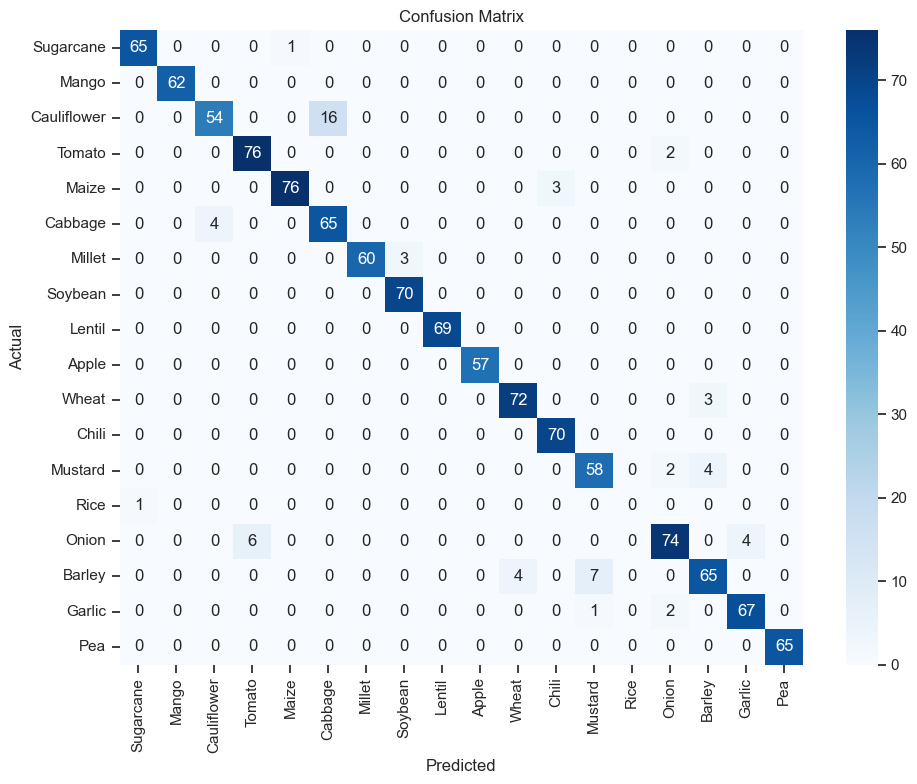

In [58]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))  

sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=crop_labels,
    yticklabels=crop_labels
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")


plt.xticks(rotation=90, ha='center')  
plt.yticks(rotation=0, va='center')


plt.tight_layout()
plt.show()

### Accuracy Score

In [36]:
y_train_pred = model.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)


y_test_pred = model.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)


print("Train accuracy:", train_score)
print("Test accuracy:", test_score)


Train accuracy: 0.9902491874322861
Test accuracy: 0.946969696969697


### Visualizing Overfitting and Underfitting

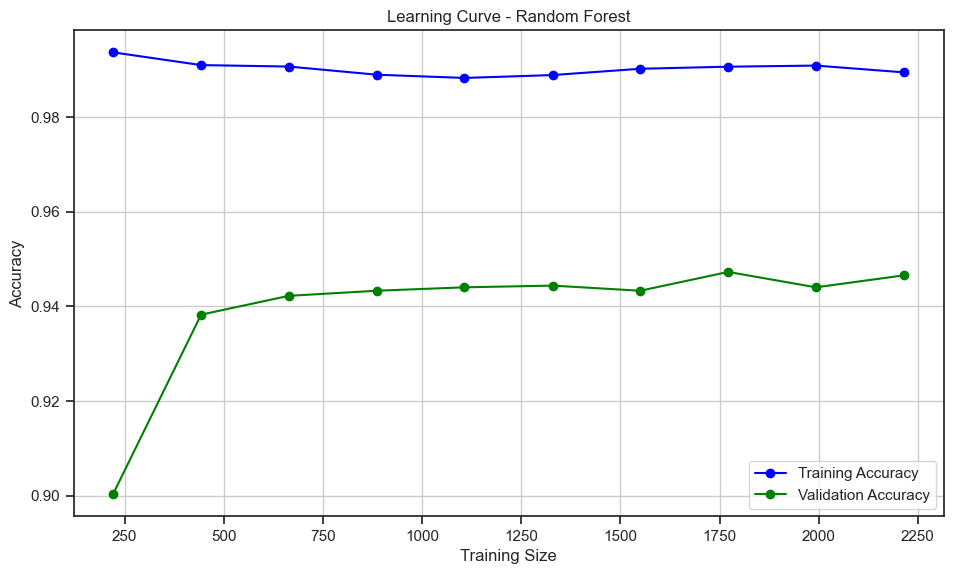

In [37]:
train_sizes, train_scores, test_scores = learning_curve(
    model.best_estimator_, X_train, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Take mean of cross-validation scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Accuracy')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        66
           2       1.00      1.00      1.00        62
           3       0.93      0.77      0.84        70
           4       0.93      0.97      0.95        78
           5       0.99      0.96      0.97        79
           6       0.80      0.94      0.87        69
           7       1.00      0.95      0.98        63
           8       0.96      1.00      0.98        70
           9       1.00      1.00      1.00        69
          10       1.00      1.00      1.00        57
          11       0.95      0.96      0.95        75
          12       0.96      1.00      0.98        70
          13       0.88      0.91      0.89        64
          14       0.00      0.00      0.00         1
          15       0.93      0.88      0.90        84
          18       0.90      0.86      0.88        76
          19       0.94      0.96      0.95        70
          20       1.00    

# Best fit model save

In [39]:
import joblib

# Get the best model from GridSearchCV
best_model = model.best_estimator_

# Define full path for saving
save_path = "C:/Users/prasa/Desktop/crop recommendation/model/crops_model.pkl"

# Save the model
joblib.dump(best_model, save_path)
print(f"Best model saved as '{save_path}'")

# Save the scaler too (important for new data)
scaler_path = "C:/Users/prasa/Desktop/crop recommendation/model/scaler.pkl"
joblib.dump(std_scaler, scaler_path)
print(f"Scaler saved as '{scaler_path}'")


Best model saved as 'C:/Users/prasa/Desktop/crop recommendation/model/crops_model.pkl'
Scaler saved as 'C:/Users/prasa/Desktop/crop recommendation/model/scaler.pkl'
